MTH522 Block: 1; Project: 2\
**Name:** Pradyoth Singenahalli Prabhu

# **9. This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data.**

### Importing required libraries

In [1]:
import pandas as pd
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
alphabet = string.ascii_letters+string.punctuation

### Importing data

In [2]:
df = pd.read_csv("https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe058464c2528214f6bba/1610604632209/Auto.csv")

### Analysis 

In [3]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [6]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


#### Checking for missing values

In [7]:
df.isnull().values.any()

False

In [8]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

***Note:*** No missing values in the dataset.

In [9]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

#### Removing symbol **'?'**

In [10]:
df.horsepower.str.strip(alphabet).astype(bool).any()

True

In [11]:
df = df[df.horsepower != '?']

In [12]:
df.shape

(392, 9)

#### Converting data-type 'object' to 'int64'

In [13]:
df["horsepower"] = pd.to_numeric(df["horsepower"])
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

## (a) Which of the predictors are quantitative, and which are qualitative?

**Quantitative**

1.   mpg
2.   cylinders
3.   displacement
4.   horsepower
5.   weight
6.   acceleration

**Qualitative**

1.   year
2.   origin
3.   name





## (b) What is the range of each quantitative predictor? You can answer this using the range() function.

#### droping column 'year', 'origin' and 'name'


In [14]:
df1 = df.copy()
df1 = df1.drop('name', axis=1)
df1 = df1.drop('year', axis=1)
df1 = df1.drop('origin', axis=1)

### Range

In [15]:
def get_range(df): 
    for col in df.columns:
        print("Range of {0}: {1} to {2}".format(col, str(df[col].min()), str(df[col].max())))

In [16]:
get_range(df1)

Range of mpg: 9.0 to 46.6
Range of cylinders: 3 to 8
Range of displacement: 68.0 to 455.0
Range of horsepower: 46 to 230
Range of weight: 1613 to 5140
Range of acceleration: 8.0 to 24.8


## (c) What is the mean and standard deviation of each quantitative predictor?

### Mean

In [17]:
df1.mean(axis = 0)

mpg               23.445918
cylinders          5.471939
displacement     194.411990
horsepower       104.469388
weight          2977.584184
acceleration      15.541327
dtype: float64

### Standard Deviation 

In [18]:
df1.std() 

mpg               7.805007
cylinders         1.705783
displacement    104.644004
horsepower       38.491160
weight          849.402560
acceleration      2.758864
dtype: float64

## (d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?


##### removing rows from 10 to 85

In [19]:
df1.shape

(392, 6)

In [20]:
df2 = df1.copy()

In [21]:
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5


In [22]:
df2.drop(axis=0, index=range(10,86), errors='ignore', inplace=True)

In [23]:
df2.shape

(317, 6)

#### Mean

In [24]:
df2.mean(axis = 0)

mpg               24.374763
cylinders          5.381703
displacement     187.880126
horsepower       101.003155
weight          2938.854890
acceleration      15.704101
dtype: float64

#### Standard Deviation

In [25]:
df2.std() 

mpg               7.872565
cylinders         1.658135
displacement    100.169973
horsepower       36.003208
weight          811.640668
acceleration      2.719913
dtype: float64

## (e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

In [26]:
df['mpg'].value_counts()

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: mpg, Length: 127, dtype: int64

<AxesSubplot:xlabel='mpg', ylabel='count'>

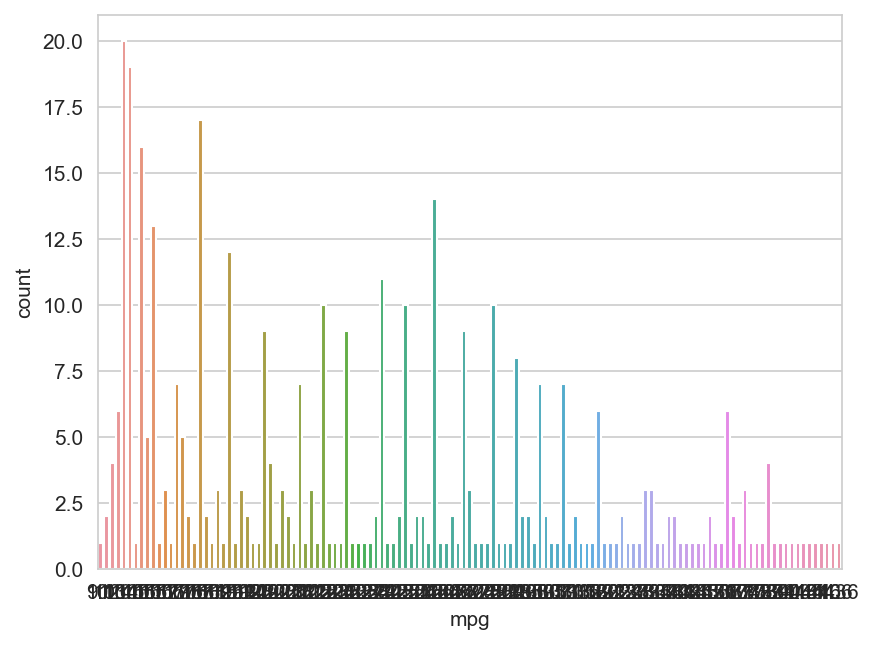

In [34]:
sns.countplot(x = df['mpg'])

**Observation:**


> Predicting 'mpg' is a regression problem.



#### Pair Plot

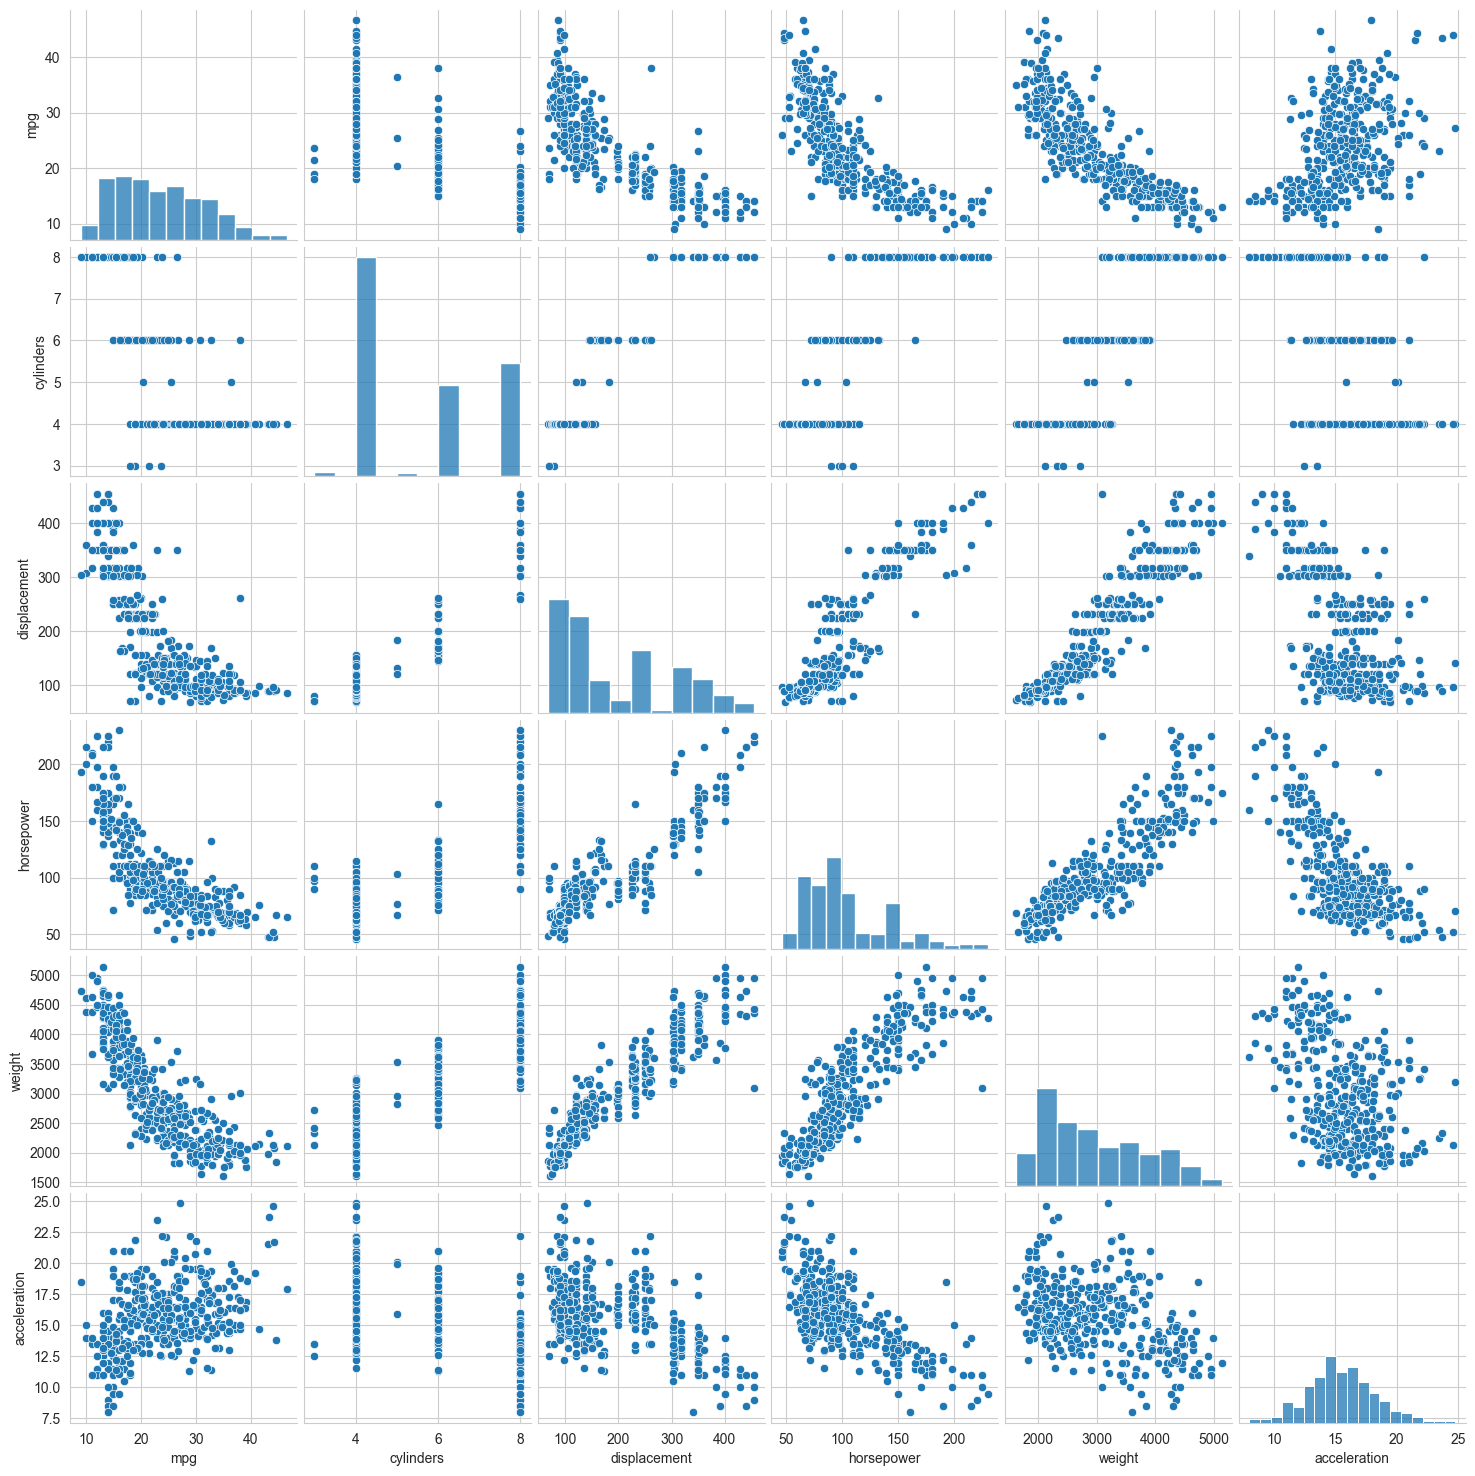

In [28]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(df1)
plt.show()

#### Correlation Matrix

<AxesSubplot:>

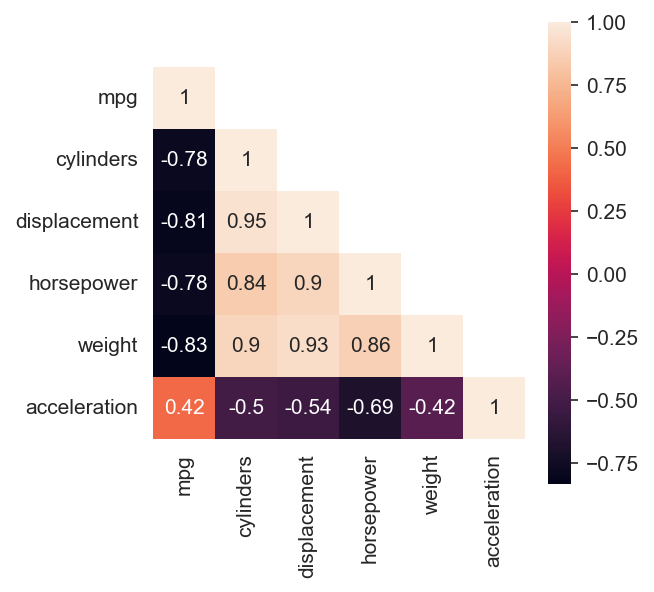

In [29]:
plt.rcParams['figure.dpi'] = 150

corr_mat = df1.corr()
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(4, 4)
sns.heatmap(data = corr_mat, mask = mask, square = True, annot = True, cbar = True)

The correlation matrix informs us on the relationship between quantitative predictors.



**Observations:**


1.   Number of cylinders have positive correlation with all the quantitative predictors except 'acceleration'.
2.   'mpg' has positive relation with 'acceleration' and negitive with all the other predators.


#### Ploting with different features


In [30]:
def box_plot(feature_x, target, dataframe = df1):
    sns.boxplot(x = target, y = feature_x, data = dataframe)
    plt.show()

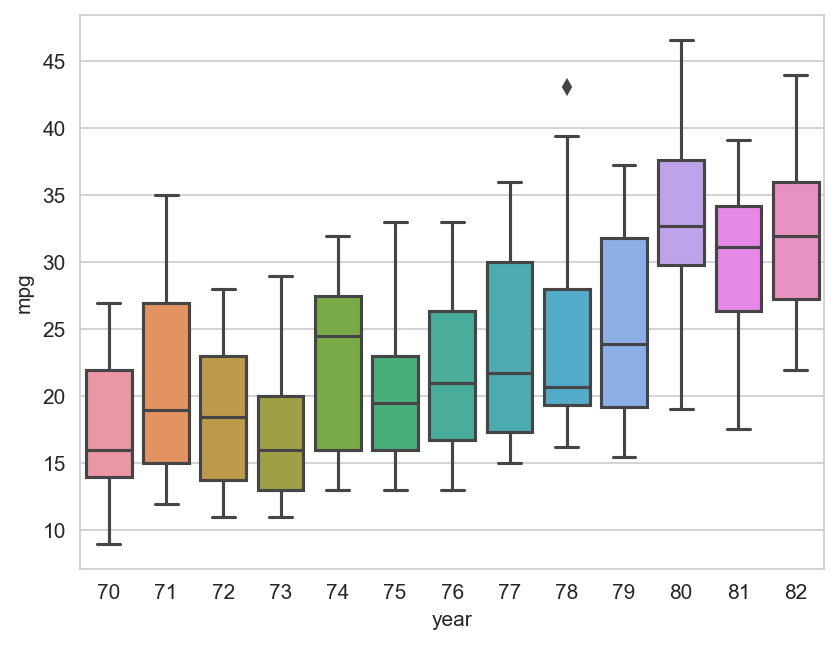

In [31]:
box_plot('mpg', 'year', df)

**Observation:**
1.   We can see from the above bar plot, average 'mpg' increased from 1970 through 1980 and slightly decreased till 1982. 
2.   In the year 1980, 'mpg' increased drastically.
3.   Bandwidth for year 1980 and 1982 is mcuh higher compare to othre year.

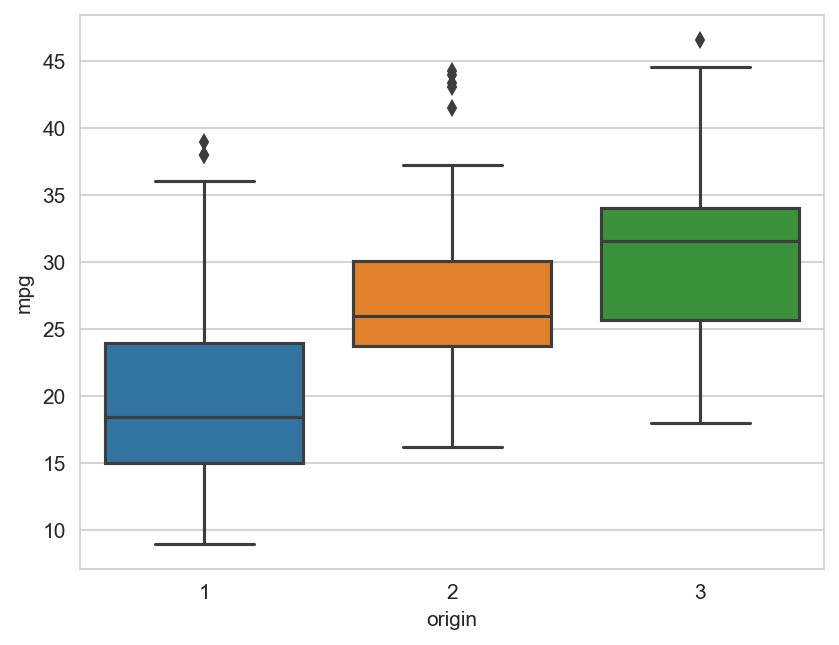

In [32]:
box_plot('mpg', 'origin', df)

**Observation:**
1.   50 percentile of origin 3 is higher than 75 percentile of origin 2 and 25 percentile of origin 3 is more than 75 percentile of origin 1. So safely we can say 'mpg' in origin 3 automobiles is higher compared to others.

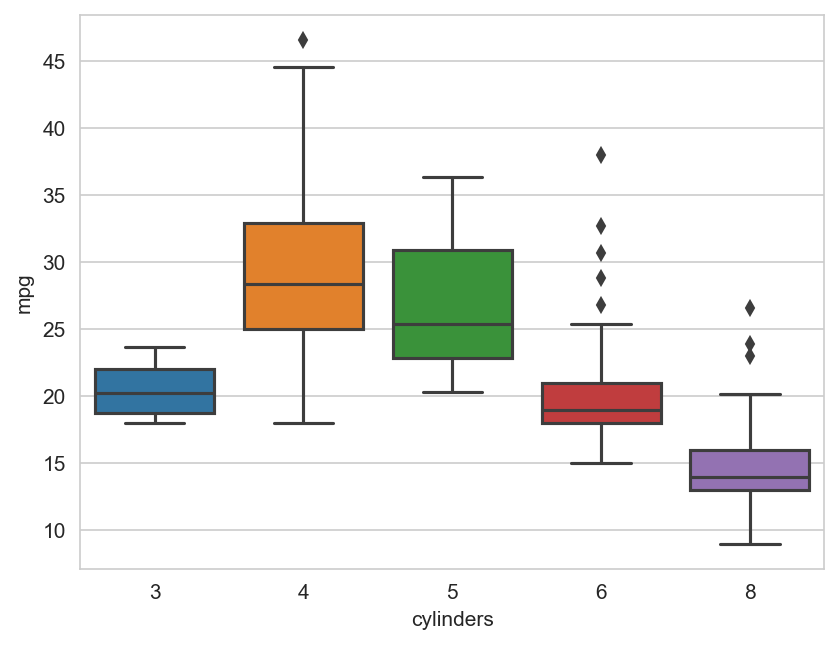

In [33]:
box_plot('mpg', 'cylinders', df1)

**Observations:**

1.   'mpg' significantly increases when 4 cylinders are used compared to 3.
2.   Lowest mpg is seen with 8 cylinders.
3.   So higher the number of cylinders lower the 'mpg'. We can also witness in this in correctional matrix.



## (f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

1.   From the pair plot and correlation matrix plotted above, we can see that 'mpg' has a negitive correlation with cylinders, displacement, horsepower and weight. Also 'mpg' has positive correlation with acceleration.

2.   Also from the above boxplots, we have observed that 'mpg' has a positive relation with year and origin.

So the above predictors can be used for predicting mpg.